In [12]:
# In this project we are going to analyze the dataset of PullRequest from Github that uses ChatGPT to review the PR's'

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# missing_values = ["N/A", "na", "--", "-"] # TODO: Please add more garbage data there

# Load the data file
data = pd.read_json('20230914_074826_pr_sharings.json')
refactoring_df = pd.json_normalize(data["Sources"])

print("The data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

display(refactoring_df.head(200))  # top rows of the refactoring commit data
display(refactoring_df.dtypes.value_counts())  # data types of the columns


# Based on the initial analysis, we have 10 columns which are object type i.e. they contain categorical data 
# and 2 remaining columns which are of int data type


The data set has 214 rows and 20 columns


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,MergedAt,UpdatedAt,State,Additions,Deletions,ChangedFiles,CommitsTotalCount,CommitShas,ChatgptSharing,CommitSha
0,pull request,https://github.com/FlorianWoelki/obsidian-symb...,sharshuv-quotient,FlorianWoelki/obsidian-symbols-prettifier,TypeScript,7,Fix constructor being converted to undefined,The issue was that regular property accessing ...,2023-08-23T14:17:59Z,None,None,2023-08-23T14:19:17Z,OPEN,17,18,1,2,"[9a7cd4283324ae4daea61445b1b09daba1279b13, 888...",[{'URL': 'https://chat.openai.com/share/acece1...,NaN
1,pull request,https://github.com/asaskevich/govalidator/pull...,apelisse,asaskevich/govalidator,Go,493,Empty string is a valid Base64 string,| Q | A\r\n|-------------- | ---...,2023-08-31T23:27:41Z,None,None,2023-08-31T23:27:41Z,OPEN,2,2,2,1,[fd13bbd0122da2a6c663ca41b84294011cad46c6],[{'URL': 'https://chat.openai.com/share/33c6f5...,NaN
2,pull request,https://github.com/mlc-ai/web-stable-diffusion...,jchris,mlc-ai/web-stable-diffusion,Jupyter Notebook,52,Add history view with downloads to demo applic...,Please try this out at https://jchris.github.i...,2023-08-30T20:38:54Z,None,None,2023-09-05T17:48:05Z,OPEN,134561,0,3,13,"[3bc83f74846a2d4143a7730f491a4e1358f2c978, f31...",[{'URL': 'https://chat.openai.com/share/a3f23f...,NaN
3,pull request,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455,feat: improved categorization helper to includ...,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,None,None,2023-06-22T15:52:32Z,OPEN,78,19,1,1,[c93f546f2b9d2b97a6f340d4a1859f2aa80fd0a7],[{'URL': 'https://chat.openai.com/share/0c7588...,NaN
4,pull request,https://github.com/xebia-functional/xef/pull/343,raulraja,xebia-functional/xef,Kotlin,343,Xef prompt language syntax examples,**Introduction of Xef Language**\r\n\r\n**Desc...,2023-08-22T12:12:30Z,None,None,2023-09-12T22:41:25Z,OPEN,3564,5,39,7,"[e0f2d1c2c4d66791fdfa1f1de3e5e5d486d4901e, 43c...",[{'URL': 'https://chat.openai.com/share/d6e8d8...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,pull request,https://github.com/ggerganov/llama.cpp/pull/1684,ikawrakow,ggerganov/llama.cpp,None,1684,k-quants,### What\r\n\r\nThis PR adds a series of 2-6 b...,2023-06-03T15:24:31Z,2023-06-05T19:56:19Z,2023-06-05T19:56:19Z,2023-08-14T10:23:53Z,MERGED,3148,29,12,32,NaN,[{'URL': 'https://chat.openai.com/share/fde90e...,"[8673a41385048f2b1089b8fc29df1e1020ab683a, b4f..."
196,pull request,https://github.com/4dn-dcic/foursight-core/pul...,dmichaels-harvard,4dn-dcic/foursight-core,None,50,Access key check updates,The main thing here is fix for access key stat...,2023-06-18T18:52:54Z,2023-07-16T14:00:03Z,2023-07-16T14:00:03Z,2023-07-16T14:00:03Z,MERGED,2465,1055,60,108,NaN,[{'URL': 'https://chat.openai.com/share/49417c...,"[c4df9865ea585cffa8c57c401d10dadc6a7a1d44, 128..."
197,pull request,https://github.com/wahanegi/vibereport/pull/64,LyubovP,wahanegi/vibereport,None,64,CI-279: Reporting,[![CI-279](https://badgen.net/badge/JIRA/CI-27...,2023-05-10T12:56:40Z,2023-06-26T13:40:48Z,2023-06-26T13:40:48Z,2023-06-26T13:40:49Z,MERGED,2144,503,46,104,NaN,[{'URL': 'https://chat.openai.com/share/7ebfba...,"[3eaceb24b341bbbb8e2fdffa7ce423f5d6866824, c73..."
198,pull request,https://github.com/hoshotakamoto/banzukesurfin...,hoshotakamoto,hoshotakamoto/banzukesurfing,None,8,Refactoring for interactivity.,https://chat.openai.com/share/76d4817d-40b6-4f...,2023-07-03T20:12:31Z,2023-07-03T22:24:54Z,2023-07-03T22:24:54Z,2023-07-03T22:25:04Z,MERGED,33,31,2,2,NaN,[{'URL': 'https://chat.openai.com/share/76d481...,"[35d3812c313ac4e37103d1059ee519a9644ad8d0, 7cc..."


object    15
int64      5
dtype: int64

In [9]:
refactoring_df.dtypes == 'object'  # showing the columns with object data type


Type               True
URL                True
Author             True
RepoName           True
RepoLanguage       True
Number            False
Title              True
Body               True
CreatedAt          True
ClosedAt           True
UpdatedAt          True
State              True
ChatgptSharing     True
dtype: bool

In [10]:
"""
As a part of the data cleaning process, we will perform the following four steps:

1. Remove the duplicate rows

2. Finding how many columns have missing data and in what quantity?

3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages

"""

'\nAs a part of the data cleaning process, we will perform the following four steps:\n\n1. Remove the duplicate rows\n\n2. Finding how many columns have missing data and in what quantity?\n\n3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages\n\n'

In [11]:
# Removing the duplicate rows
# refactoring_df.drop_duplicates()

In [12]:
# checking the nan/null values in the data
refactoring_df.isnull().sum().sort_values(ascending=False)


# As we can see that there are 
#     1. 122 rows with missing data in the `RepoLanguage` field and 
#     2. 100 rows with missing data in the `MergedAt` field
#     3. 79 rows with missing data in the `ClosedAt` field

ClosedAt          229
RepoLanguage       34
ChatgptSharing      0
State               0
UpdatedAt           0
CreatedAt           0
Body                0
Title               0
Number              0
RepoName            0
Author              0
URL                 0
Type                0
dtype: int64

In [13]:
refactoring_df.dropna(axis = 0, subset = ['ChatgptSharing'], how = 'any', inplace=True)

print("The filtered data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

The filtered data set has 422 rows and 13 columns


In [14]:
# For missing `RepoLanguage` field, we are forming it using `Multiple language` as we have checked that multiple programming
# languages are being used in certain repositories and their RepoLanguage is not set, So by default their value is None.

# Define a function to fill null values in 'RepoLanguage' column
def replace_none_func(row):    
    if pd.isnull(row['RepoLanguage']):
        return "Multiple Languages"
    
    return row['RepoLanguage']
    

# # Apply the lambda function to update the 'None' column
refactoring_df['RepoLanguage'] = refactoring_df.apply(replace_none_func, axis=1)
display(refactoring_df.head(200)) 

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,UpdatedAt,State,ChatgptSharing
0,issue,https://github.com/Tommie1236/mipsi/issues/3,Tommie1236,Tommie1236/mipsi,CSS,3,be able to start/stop/reboot/send commands to ...,https://chat.openai.com/share/b50a1f89-6c17-41...,2023-09-10T11:34:10Z,None,2023-09-10T11:36:02Z,OPEN,[{'URL': 'https://chat.openai.com/share/b50a1f...
1,issue,https://github.com/ariel1985/aipages/issues/4,ariel1985,ariel1985/aipages,HTML,4,Before production: rasa URL needs to be a glob...,https://chat.openai.com/share/e5079f09-2835-49...,2023-09-13T20:58:03Z,None,2023-09-13T22:41:28Z,OPEN,[{'URL': 'https://chat.openai.com/share/e5079f...
2,issue,https://github.com/gakusyutai/gakusyutai.githu...,yuyu31,gakusyutai/gakusyutai.github.io,HTML,31,ハンバーガーメニューの実装,- https://chat.openai.com/share/8b0f517f-1aaf-...,2023-07-23T15:38:42Z,None,2023-07-23T15:38:42Z,OPEN,[{'URL': 'https://chat.openai.com/share/795827...
3,issue,https://github.com/jabrena/aqa-tests-experimen...,jabrena,jabrena/aqa-tests-experiments,Java,4,Run a test in multiple java distros,- https://chat.openai.com/share/e169e9a7-40c5-...,2023-07-07T20:30:07Z,None,2023-07-08T11:56:45Z,OPEN,[{'URL': 'https://chat.openai.com/share/b508dd...
4,issue,https://github.com/purpleslurple/PurpleSlurple...,purpleslurple,purpleslurple/PurpleSlurple,PHP,109,Store annotations in local storage (duh!),https://chat.openai.com/share/86580fc7-2c60-49...,2023-09-10T02:36:28Z,None,2023-09-10T02:36:28Z,OPEN,[{'URL': 'https://chat.openai.com/share/86580f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,issue,https://github.com/neilenns/react-access-code-...,neilenns,neilenns/react-access-code-map,TypeScript,5,Add axios interceptor to set the header token,Code from ChatGPT: https://chat.openai.com/sha...,2023-07-03T15:42:08Z,2023-07-08T19:17:38Z,2023-07-08T19:17:38Z,CLOSED,[{'URL': 'https://chat.openai.com/share/861115...
196,issue,https://github.com/bcmi/Foreground-Object-Sear...,Zhang-Yexun,bcmi/Foreground-Object-Search-Dataset-FOSD,Python,2,按照requirement.txt中的numpy版本不能使用import fiftyone,![image](https://github.com/bcmi/Foreground-Ob...,2023-08-19T00:57:43Z,2023-08-26T01:04:06Z,2023-08-26T01:04:06Z,CLOSED,[{'URL': 'https://chat.openai.com/share/0b7c3b...
197,issue,https://github.com/LikeLion-at-DGU/backback_ba...,tkdwns414,LikeLion-at-DGU/backback_backend,Python,61,오운완 level 기능 추가,1. Profile 모델에 completed_cnt 필드를 추가합니다.(read_o...,2023-08-10T21:00:26Z,2023-08-14T05:45:55Z,2023-08-14T05:45:55Z,CLOSED,[{'URL': 'https://chat.openai.com/share/27e5de...
198,issue,https://github.com/tomcl/issie/issues/348,tomcl,tomcl/issie,F#,348,Modern wire circles placed in wrong position,Bug:\r\n\r\nWhen two wires are identical for f...,2023-08-07T17:40:02Z,None,2023-09-04T03:08:52Z,OPEN,[{'URL': 'https://chat.openai.com/share/4141ee...


In [15]:

plt.figure(figsize=(15, 8))
plt.bar(refactoring_df["RepoLanguage"], refactoring_df["CommitsTotalCount"])
plt.title("Repository Languages vs Commits")
plt.xlabel("Language")
plt.ylabel("Commits")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


KeyError: 'CommitsTotalCount'

In [37]:
#Above graph says that repositories with multiple languages (i.e multi-modules project) 
#have more number of commits as compared to repository with single language (single project)

#Now we are going to check the number of Pull Request that are open based on the RepoLanguage
c_df = refactoring_df[refactoring_df["RepoLanguage"]=="C"].copy()
csharp_df = refactoring_df[refactoring_df["RepoLanguage"]=="C#"].copy()
cplus_df = refactoring_df[refactoring_df["RepoLanguage"]=="C++"].copy()
dart_df = refactoring_df[refactoring_df["RepoLanguage"]=="Dart"].copy()
fsharp_df = refactoring_df[refactoring_df["RepoLanguage"]=="F#"].copy()
go_df = refactoring_df[refactoring_df["RepoLanguage"]=="Go"].copy()
html_df = refactoring_df[refactoring_df["RepoLanguage"]=="HTML"].copy()
java_df = refactoring_df[refactoring_df["RepoLanguage"]=="Java"].copy()
javascript_df = refactoring_df[refactoring_df["RepoLanguage"]=="JavaScript"].copy()
jupyter_df = refactoring_df[refactoring_df["RepoLanguage"]=="Jupyter Notebook"].copy()
kotlin_df = refactoring_df[refactoring_df["RepoLanguage"]=="Kotlin"].copy()
php_df = refactoring_df[refactoring_df["RepoLanguage"]=="Php"].copy()
python_df = refactoring_df[refactoring_df["RepoLanguage"]=="Python"].copy()
ruby_df = refactoring_df[refactoring_df["RepoLanguage"]=="Ruby"].copy()
scss_df = refactoring_df[refactoring_df["RepoLanguage"]=="SCSS"].copy()
shell_df = refactoring_df[refactoring_df["RepoLanguage"]=="Shell"].copy()
tsql_df = refactoring_df[refactoring_df["RepoLanguage"]=="TSQL"].copy()
typescript_df = refactoring_df[refactoring_df["RepoLanguage"]=="TypeScript"].copy()
vue_df = refactoring_df[refactoring_df["RepoLanguage"]=="Vue"].copy()


plt.figure(figsize=(15, 8))
plt.bar(refactoring_df["RepoLanguage"],refactoring_df["State"])
plt.title("Repository Languages vs PR State")
plt.xlabel("Language")
plt.ylabel("PR State")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]


ValueError: x and y must have same first dimension, but have shapes (214,) and (1,)

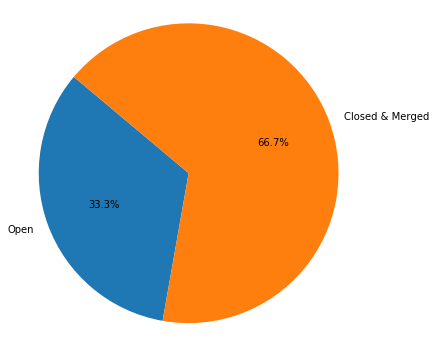

In [23]:
total_no_open = len(refactoring_df["State"]=="OPEN")
total_no_merged = len(refactoring_df["State"]=="MERGED")
total_no_closed = len(refactoring_df["State"]=="CLOSED")
labels = ['Open', 'Closed & Merged']
sizes = [total_no_open, total_no_closed+total_no_merged]  
# These values represent the percentage distribution of each category

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
import sqlite3

# Connect to or create an SQLite database
conn = sqlite3.connect('my_database.db')

# Create a cursor
cursor = conn.cursor()

# Create a table
cursor.execute('''CREATE TABLE IF NOT EXISTS github_issues_table (
                    id INTEGER PRIMARY KEY,
                    name TEXT,
                    age INTEGER
                )''')

# Insert data into the table
cursor.execute('INSERT INTO my_table (name, age) VALUES (?, ?)', ('Alice', 30))

# Commit changes
conn.commit()

# Close the connection
conn.close()
